In [31]:
from surprise import Dataset
from surprise import NormalPredictor
from surprise import Reader
from surprise.model_selection import cross_validate
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('./the-movies-dataset/ratings.csv',encoding='utf-8',dtype=np.float64)

In [21]:
df.head()

,userId,movieId,rating,timestamp
0,1.0,110.0,1.0,1.425942e+09
1,1.0,147.0,4.5,1.425942e+09
2,1.0,858.0,5.0,1.425942e+09
3,1.0,1221.0,5.0,1.425942e+09
4,1.0,1246.0,5.0,1.425942e+09


In [22]:
del df['timestamp']

In [23]:
df.head()

,userId,movieId,rating
0,1.0,110.0,1.0
1,1.0,147.0,4.5
2,1.0,858.0,5.0
3,1.0,1221.0,5.0
4,1.0,1246.0,5.0


In [36]:
df.shape[0]

26024289

In [38]:
df_small = df[0:2000000]

In [42]:
dt = df_small.set_index(['userId','movieId']).unstack()
dt.iloc[0:20,0:20].fillna('')

rating                                                              \
movieId   1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0 11.0 12.0 13.0   
userId                                                                       
1.0                                                                          
2.0                              3                                           
3.0                                                                          
4.0                                                                          
5.0                                        3                                 
6.0                                                            3             
7.0                                                                          
8.0          4                             2                                 
9.0        4.5                                                               
10.0                                                                         
11.0                                                                         
12.0         4                                                               
13.0                                                                         
14.0                                                                         
15.0                                  4                                      
16.0                                                                         
17.0                                                                         
18.0                                                                         
19.0                                                                         
20.0         4                                                               

                                            
movieId 14.0 15.0 16.0 17.0 18.0 19.0 20.0  
userId                                      
1.0                                         
2.0                                         
3.0                                         
4.0                                         
5.0                                         
6.0                                         
7.0                                         
8.0                                         
9.0                                         
10.0                                        
11.0                                        
12.0                 4    4                 
13.0                                        
14.0                                        
15.0                                        
16.0                                        
17.0                                        
18.0                                        
19.0                                        
20.0

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Rate Matrix')

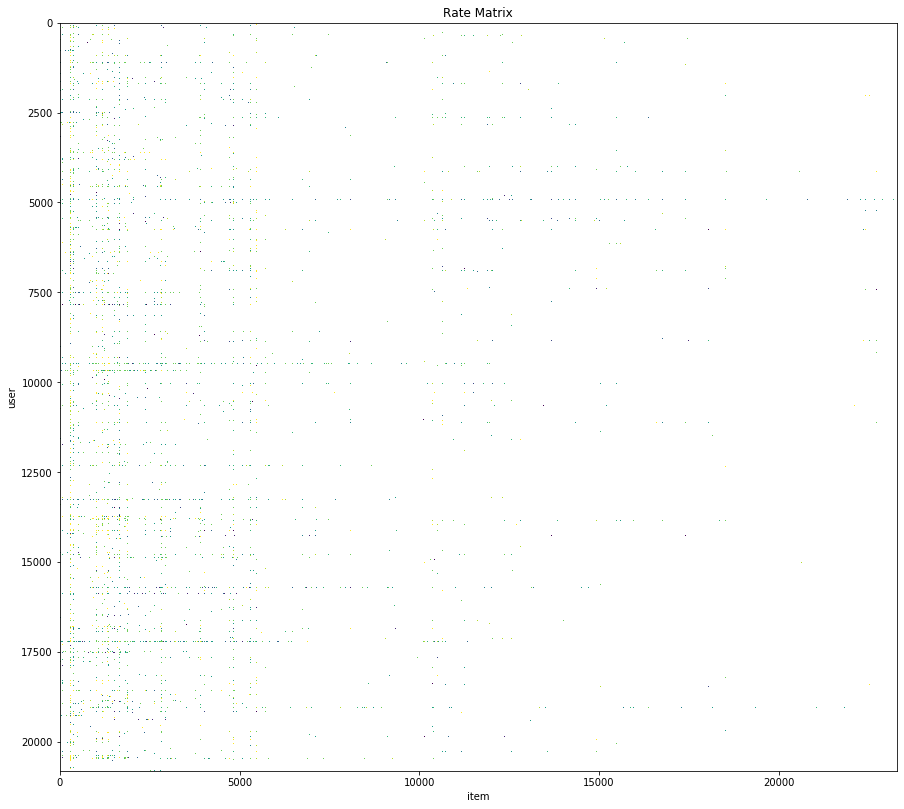

In [44]:
plt.figure(figsize=(15,15))
plt.imshow(dt)
plt.grid(False)
plt.xlabel('movie')
plt.ylabel('user')
plt.title('Rate Matrix')

In [45]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df_small[['userId', 'movieId', 'rating']], reader)

In [46]:
from surprise.model_selection import KFold

In [47]:
bsl_param = {'method':'als','n_epochs':5,'reg_u':12,'reg_i':5}
model = surprise.BaselineOnly(bsl_options=bsl_param)

In [48]:
acc = np.zeros(3)
cv = KFold(3)
for i ,(trainset, testset) in enumerate(cv.split(data)):
    model.fit(trainset)
    pred = model.test(testset)
    acc[i] = surprise.accuracy.rmse(pred,verbose=True)
acc.mean()

Estimating biases using als...
RMSE: 0.8679
Estimating biases using als...
RMSE: 0.8667
Estimating biases using als...
RMSE: 0.8670


0.8671896541364298

In [50]:
cross_validate(model,data)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.86564115, 0.86543054, 0.86603822, 0.86653706, 0.86437214]),
 'test_mae': array([0.66302003, 0.66245962, 0.66356813, 0.66395052, 0.66194316]),
 'fit_time': (3.956418037414551,
  4.544849634170532,
  4.678475379943848,
  4.569777727127075,
  4.728366851806641),
 'test_time': (3.7739145755767822,
  2.8114967346191406,
  2.8613648414611816,
  2.858372926712036,
  2.78057861328125)}

In [49]:
# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(NormalPredictor(), data, cv=2)

{'test_rmse': array([1.43427945, 1.43480161]),
 'test_mae': array([1.14421841, 1.14492802]),
 'fit_time': (1.4421498775482178, 1.9428174495697021),
 'test_time': (5.5252158641815186, 12.944353580474854)}